In [5]:
from common.problem import Problem
from algorithm.idlhc import IDLHC

generations = 100
num_of_individuals = 100
num_of_variables = 100
direction = "MAX"

num_pdf = 20 
num_cut_pdf = 0.1

In [7]:
from common.knapsack import Knapsack
import random

capacity = 2000
values = [random.randint(1, 100) for i in range(num_of_variables)]
weights = [random.randint(1, 100) for i in range(num_of_variables)]
ratios = [values[i] / weights[i] for i in range(num_of_variables)]

sorted_ratio_indexes = sorted(range(len(values)), key=lambda i: values[i])

knapsack_vars = Knapsack(
    capacity=capacity,
    values=values,
    weights=weights,
    sorted_ratio_indexes=sorted_ratio_indexes,
)

In [3]:
def knapsack_bench(individual, knapsack_vars):
    if len(individual.features) != len(knapsack_vars.values) or len(individual.features) != len(
        knapsack_vars.weights
    ):
        return False

    total_value = 0
    individual.total_weight = 0

    for i in range(len(individual.features)):
        if individual.features[i] != 0 and individual.features[i] != 1:
            return False
        elif individual.features[i] == 1:
            individual.total_weight += knapsack_vars.weights[i]
            total_value += knapsack_vars.values[i]

    return total_value

In [4]:
def knapsack_repair(individual,knapsack_vars):
    if individual.total_weight <= knapsack_vars.capacity:
        return individual
    for i in range(len(knapsack_vars.values)):
        if individual.total_weight > knapsack_vars.capacity:
            index = knapsack_vars.sorted_ratio_indexes[i]
            if individual.features[index] == 1:
                individual.features[index] = 0
                individual.total_weight -= knapsack_vars.weights[index]
                individual.objective -= knapsack_vars.values[index]
        else:
            break
    return individual

In [5]:
# {
#     "capacity": 200,
#     "values": [random.randint(1, 100) for i in range(num_of_variables)],
#     "weights": [random.randint(1, 100) for i in range(num_of_variables)],
#     "ratios": [],
#     "sorted_ratio_indexes": [],
#     "total_weight": 0,
#     "total_value": 0,
# }




# print(
#     knapsack_bench(
#         [random.randint(0, 1) for i in range(num_of_variables)], knapsack_vars
#     )
# )
# print(knapsack_vars["total_weight"], knapsack_vars["capacity"])

In [6]:
print(knapsack_vars.values, "\n", knapsack_vars.weights, "\n", knapsack_vars.sorted_ratio_indexes)

[9, 23, 86, 1, 16, 24, 33, 11, 100, 34, 32, 23, 71, 39, 18, 72, 71, 14, 56, 61, 36, 97, 9, 32, 52, 22, 77, 100, 34, 64, 88, 80, 23, 88, 74, 32, 50, 70, 51, 25, 8, 80, 3, 4, 68, 75, 96, 12, 15, 21, 6, 90, 19, 14, 78, 94, 30, 14, 58, 15, 44, 56, 39, 85, 86, 83, 40, 41, 73, 7, 29, 100, 22, 29, 55, 97, 91, 39, 36, 60, 9, 47, 71, 12, 22, 37, 36, 97, 84, 4, 61, 23, 74, 42, 41, 64, 97, 30, 22, 38] 
 [62, 76, 1, 11, 20, 57, 26, 84, 96, 44, 88, 90, 25, 80, 23, 7, 42, 6, 69, 95, 78, 46, 67, 37, 17, 84, 73, 52, 17, 82, 25, 18, 92, 10, 87, 60, 58, 90, 68, 54, 28, 21, 23, 34, 44, 66, 24, 60, 89, 75, 85, 94, 18, 98, 55, 61, 65, 71, 65, 87, 55, 8, 51, 26, 19, 32, 31, 8, 99, 19, 84, 98, 83, 42, 60, 10, 92, 86, 8, 16, 51, 30, 25, 79, 82, 29, 49, 9, 98, 61, 63, 33, 68, 93, 65, 96, 53, 35, 57, 7] 
 [3, 42, 43, 89, 50, 69, 40, 0, 22, 80, 7, 47, 83, 17, 53, 57, 48, 59, 4, 14, 52, 49, 25, 72, 84, 98, 1, 11, 32, 91, 5, 39, 70, 73, 56, 97, 10, 23, 35, 6, 9, 28, 20, 78, 86, 85, 99, 13, 62, 77, 66, 67, 94, 93, 

In [7]:
# define a classe de problema
problem = Problem(num_of_variables=num_of_variables,
                      num_of_individuals=num_of_individuals,
                      num_of_generations=generations,
                      objective=[knapsack_bench],# ATENÇÃO: aqui ele passa uma função
                      repair=[knapsack_repair],
                      objective_vars= knapsack_vars,
                      mutation=(1/num_of_variables),
                      variables_range=[0, 1],
                      direction=direction,
                      initial_population_type=2,)

Generation: 0
Generation: 1
Generation: 2
Generation: 3
Generation: 4
Generation: 5
Generation: 6
Generation: 7
Generation: 8
Generation: 9
Generation: 10
Generation: 11
Generation: 12
Generation: 13
Generation: 14
Generation: 15
Generation: 16
Generation: 17
Generation: 18
Generation: 19
Generation: 20
Generation: 21
Generation: 22
Generation: 23
Generation: 24
Generation: 25
Generation: 26
Generation: 27
Generation: 28
Generation: 29
Generation: 30
Generation: 31
Generation: 32
Generation: 33
Generation: 34
Generation: 35
Generation: 36
Generation: 37
Generation: 38
Generation: 39
Generation: 40
Generation: 41
Generation: 42
Generation: 43
Generation: 44
Generation: 45
Generation: 46
Generation: 47
Generation: 48
Generation: 49
Generation: 50
Generation: 51
Generation: 52
Generation: 53
Generation: 54
Generation: 55
Generation: 56
Generation: 57
Generation: 58
Generation: 59
Generation: 60
Generation: 61
Generation: 62
Generation: 63
Generation: 64
Generation: 65
Generation: 66
Gener

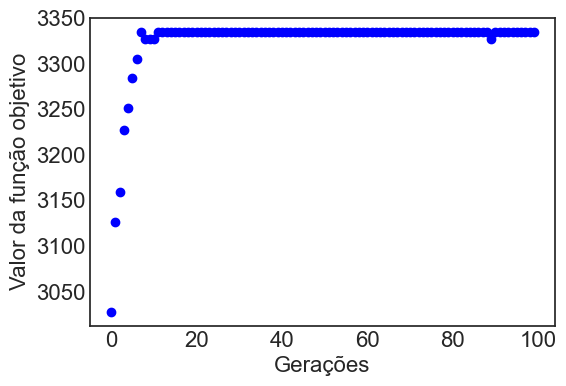

Generation: 0
Generation: 1
Generation: 2
Generation: 3
Generation: 4
Generation: 5
Generation: 6
Generation: 7
Generation: 8
Generation: 9
Generation: 10
Generation: 11
Generation: 12
Generation: 13
Generation: 14
Generation: 15
Generation: 16
Generation: 17
Generation: 18
Generation: 19
Generation: 20
Generation: 21
Generation: 22
Generation: 23
Generation: 24
Generation: 25
Generation: 26
Generation: 27
Generation: 28
Generation: 29
Generation: 30
Generation: 31
Generation: 32
Generation: 33
Generation: 34
Generation: 35
Generation: 36
Generation: 37
Generation: 38
Generation: 39
Generation: 40
Generation: 41
Generation: 42
Generation: 43
Generation: 44
Generation: 45
Generation: 46
Generation: 47
Generation: 48
Generation: 49
Generation: 50
Generation: 51
Generation: 52
Generation: 53
Generation: 54
Generation: 55
Generation: 56
Generation: 57
Generation: 58
Generation: 59
Generation: 60
Generation: 61
Generation: 62
Generation: 63
Generation: 64
Generation: 65
Generation: 66
Gener

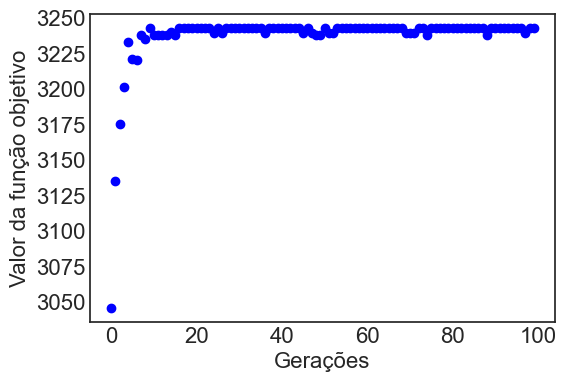

Generation: 0
Generation: 1
Generation: 2
Generation: 3
Generation: 4
Generation: 5
Generation: 6
Generation: 7
Generation: 8
Generation: 9
Generation: 10
Generation: 11
Generation: 12
Generation: 13
Generation: 14
Generation: 15
Generation: 16
Generation: 17
Generation: 18
Generation: 19
Generation: 20
Generation: 21
Generation: 22
Generation: 23
Generation: 24
Generation: 25
Generation: 26
Generation: 27
Generation: 28
Generation: 29
Generation: 30
Generation: 31
Generation: 32
Generation: 33
Generation: 34
Generation: 35
Generation: 36
Generation: 37
Generation: 38
Generation: 39
Generation: 40
Generation: 41
Generation: 42
Generation: 43
Generation: 44
Generation: 45
Generation: 46
Generation: 47
Generation: 48
Generation: 49
Generation: 50
Generation: 51
Generation: 52
Generation: 53
Generation: 54
Generation: 55
Generation: 56
Generation: 57
Generation: 58
Generation: 59
Generation: 60
Generation: 61
Generation: 62
Generation: 63
Generation: 64
Generation: 65
Generation: 66
Gener

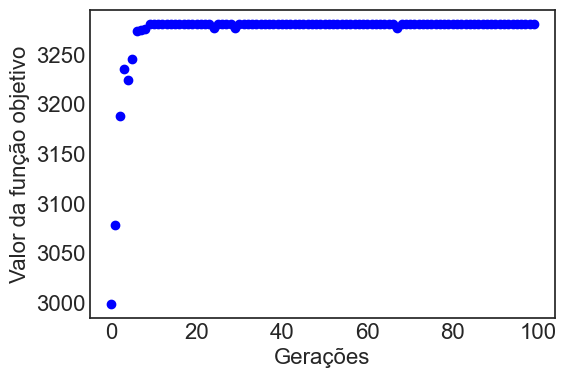

Generation: 0
Generation: 1
Generation: 2
Generation: 3
Generation: 4
Generation: 5
Generation: 6
Generation: 7
Generation: 8
Generation: 9
Generation: 10
Generation: 11
Generation: 12
Generation: 13
Generation: 14
Generation: 15
Generation: 16
Generation: 17
Generation: 18
Generation: 19
Generation: 20
Generation: 21
Generation: 22
Generation: 23
Generation: 24
Generation: 25
Generation: 26
Generation: 27
Generation: 28
Generation: 29
Generation: 30
Generation: 31
Generation: 32
Generation: 33
Generation: 34
Generation: 35
Generation: 36
Generation: 37
Generation: 38
Generation: 39
Generation: 40
Generation: 41
Generation: 42
Generation: 43
Generation: 44
Generation: 45
Generation: 46
Generation: 47
Generation: 48
Generation: 49
Generation: 50
Generation: 51
Generation: 52
Generation: 53
Generation: 54
Generation: 55
Generation: 56
Generation: 57
Generation: 58
Generation: 59
Generation: 60
Generation: 61
Generation: 62
Generation: 63
Generation: 64
Generation: 65
Generation: 66
Gener

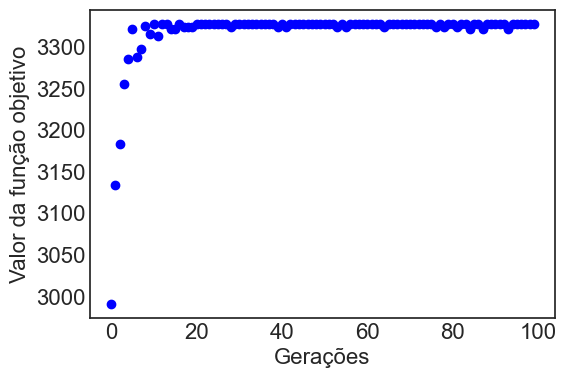

In [8]:
num_iterations = 4

first_gens = []
best_values = []
population_gen_type = problem.initial_population_type
problem_type = "knapsack"
convergences = []

for i in range(num_iterations):
    iteration = IDLHC(problem, num_pdf=num_pdf, num_cut_pdf=num_cut_pdf)
    iteration.do()
    best_value = max(iteration.convergence_array)
    best_values.append(best_value)
    convergences.append(iteration.convergence_array)

    for n in range(len(iteration.convergence_array)):
        if iteration.convergence_array[n] == best_values[i]:
            first_gens.append(n)
            break
    
    # item_var = {"Iteration": i, "Best value per generation": max(iteration.convergence_array), "First generation to reach best value": n, "type": problem.initial_population_type}



In [9]:
import pandas as pd
from pathlib import Path  

df2 = pd.DataFrame(

    {
        "best_value" : best_values,
        "firstgen_with_best_value": first_gens,
        "population_gen_type": population_gen_type,
        "problem_type" : problem_type,
        "convergence_array": ''
    }
)

for i in range(len(best_values)):
    df2.at[i,"convergence_array"] = convergences[i]

filepath = Path('metrics/knapsack.csv')

filepath.parent.mkdir(parents=True, exist_ok=True)  

df2.to_csv(filepath,mode='a',index=False,header=False)

In [14]:
import pandas as pd
from pathlib import Path  

final_dict = {}
num_of_problems = 100
capacity = 2000

def gen_problem_vars():
    values= [random.randint(1, 100) for i in range(num_of_variables)]
    weights= [random.randint(1, 100) for i in range(num_of_variables)]

    ratios = [values[i] / weights[i] for i in range(num_of_variables)]

    sorted_ratio_indexes = sorted(
        range(len(values)), key=lambda i: ratios[i]
    )
    return values,weights,ratios,sorted_ratio_indexes

zero_list = ['' for i in range(num_of_problems)]

problems_to_bench = pd.DataFrame(
    
    {
        "values": zero_list.copy(),
        "weights": zero_list.copy(),
        "sorted_ratio_indexes": zero_list.copy(),
        "ratios": zero_list.copy(),
        "capacity": capacity,
    }
)


for i in range(num_of_problems):
    values,weights,ratios,sorted_ratio_indexes = gen_problem_vars()
    
    problems_to_bench.at[i, "values"] = values
    problems_to_bench.at[i, "weights"] = weights
    problems_to_bench.at[i, "ratios"] = ratios
    problems_to_bench.at[i, "sorted_ratio_indexes"] = sorted_ratio_indexes


filepath_1 = Path('problems/knapsack_problems.csv')

filepath_1.parent.mkdir(parents=True, exist_ok=True)  

problems_to_bench.to_csv(filepath_1,mode='a',index=False,header=True)

In [15]:
problems_to_bench.head()

AttributeError: 'PosixPath' object has no attribute 'head'

In [10]:
df2.head()

,best_value,firstgen_with_best_value,population_gen_type,problem_type,convergence_array
0,3335,11,2,knapsack,"[3028, 3126, 3159, 3227, 3251, 3284, 3305, 333..."
1,3243,9,2,knapsack,"[3046, 3135, 3175, 3201, 3233, 3221, 3220, 323..."
2,3281,9,2,knapsack,"[2999, 3078, 3188, 3235, 3224, 3245, 3274, 327..."
3,3328,10,2,knapsack,"[2991, 3134, 3183, 3255, 3285, 3321, 3288, 329..."
